=== 5-1-(2) ===
[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
=== 5-1-(3) ===
[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
=== 5-1-(4) ===
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


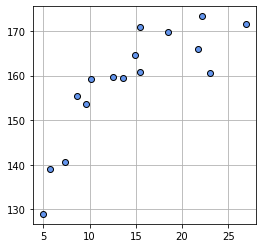

In [3]:
# リスト 5-1-(1) ： 1次元入力の直線モデル
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ生成 -----------------------------------------
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

# リスト 5-1-(2)
print('=== 5-1-(2) ===')
print(X)

# リスト 5-1-(3)
print('=== 5-1-(3) ===')
print(np.round(X, 2))

# リスト 5-1-(4)
print('=== 5-1-(4) ===')
print(np.round(T, 2))

# リスト 5-1-(5)
# データグラフ表示 -----------------------------------
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.grid(True)
plt.show()

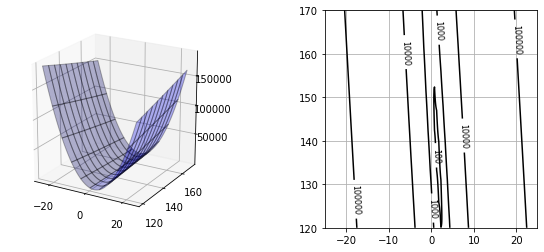

In [6]:
# リスト 5-1-(6) : 二乗誤差関数
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 平均誤差関数 -----------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t) ** 2)
    return mse

# 計算 ------------------------------------------
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 表示 ------------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


In [10]:
# リスト 5-1-(7) : 勾配法
# 平均二乗誤差の勾配 ------------------------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

# リスト 5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[319.25550118 395.08112336 215.0285937  290.58314316 251.6889727
 238.08464869 261.56505284 301.39018176 314.19186856 349.7041835
 319.7986286  386.3048751  266.11306243 434.5293591  221.8468983
 382.61687754]
[5046.3  301.8]
